In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd

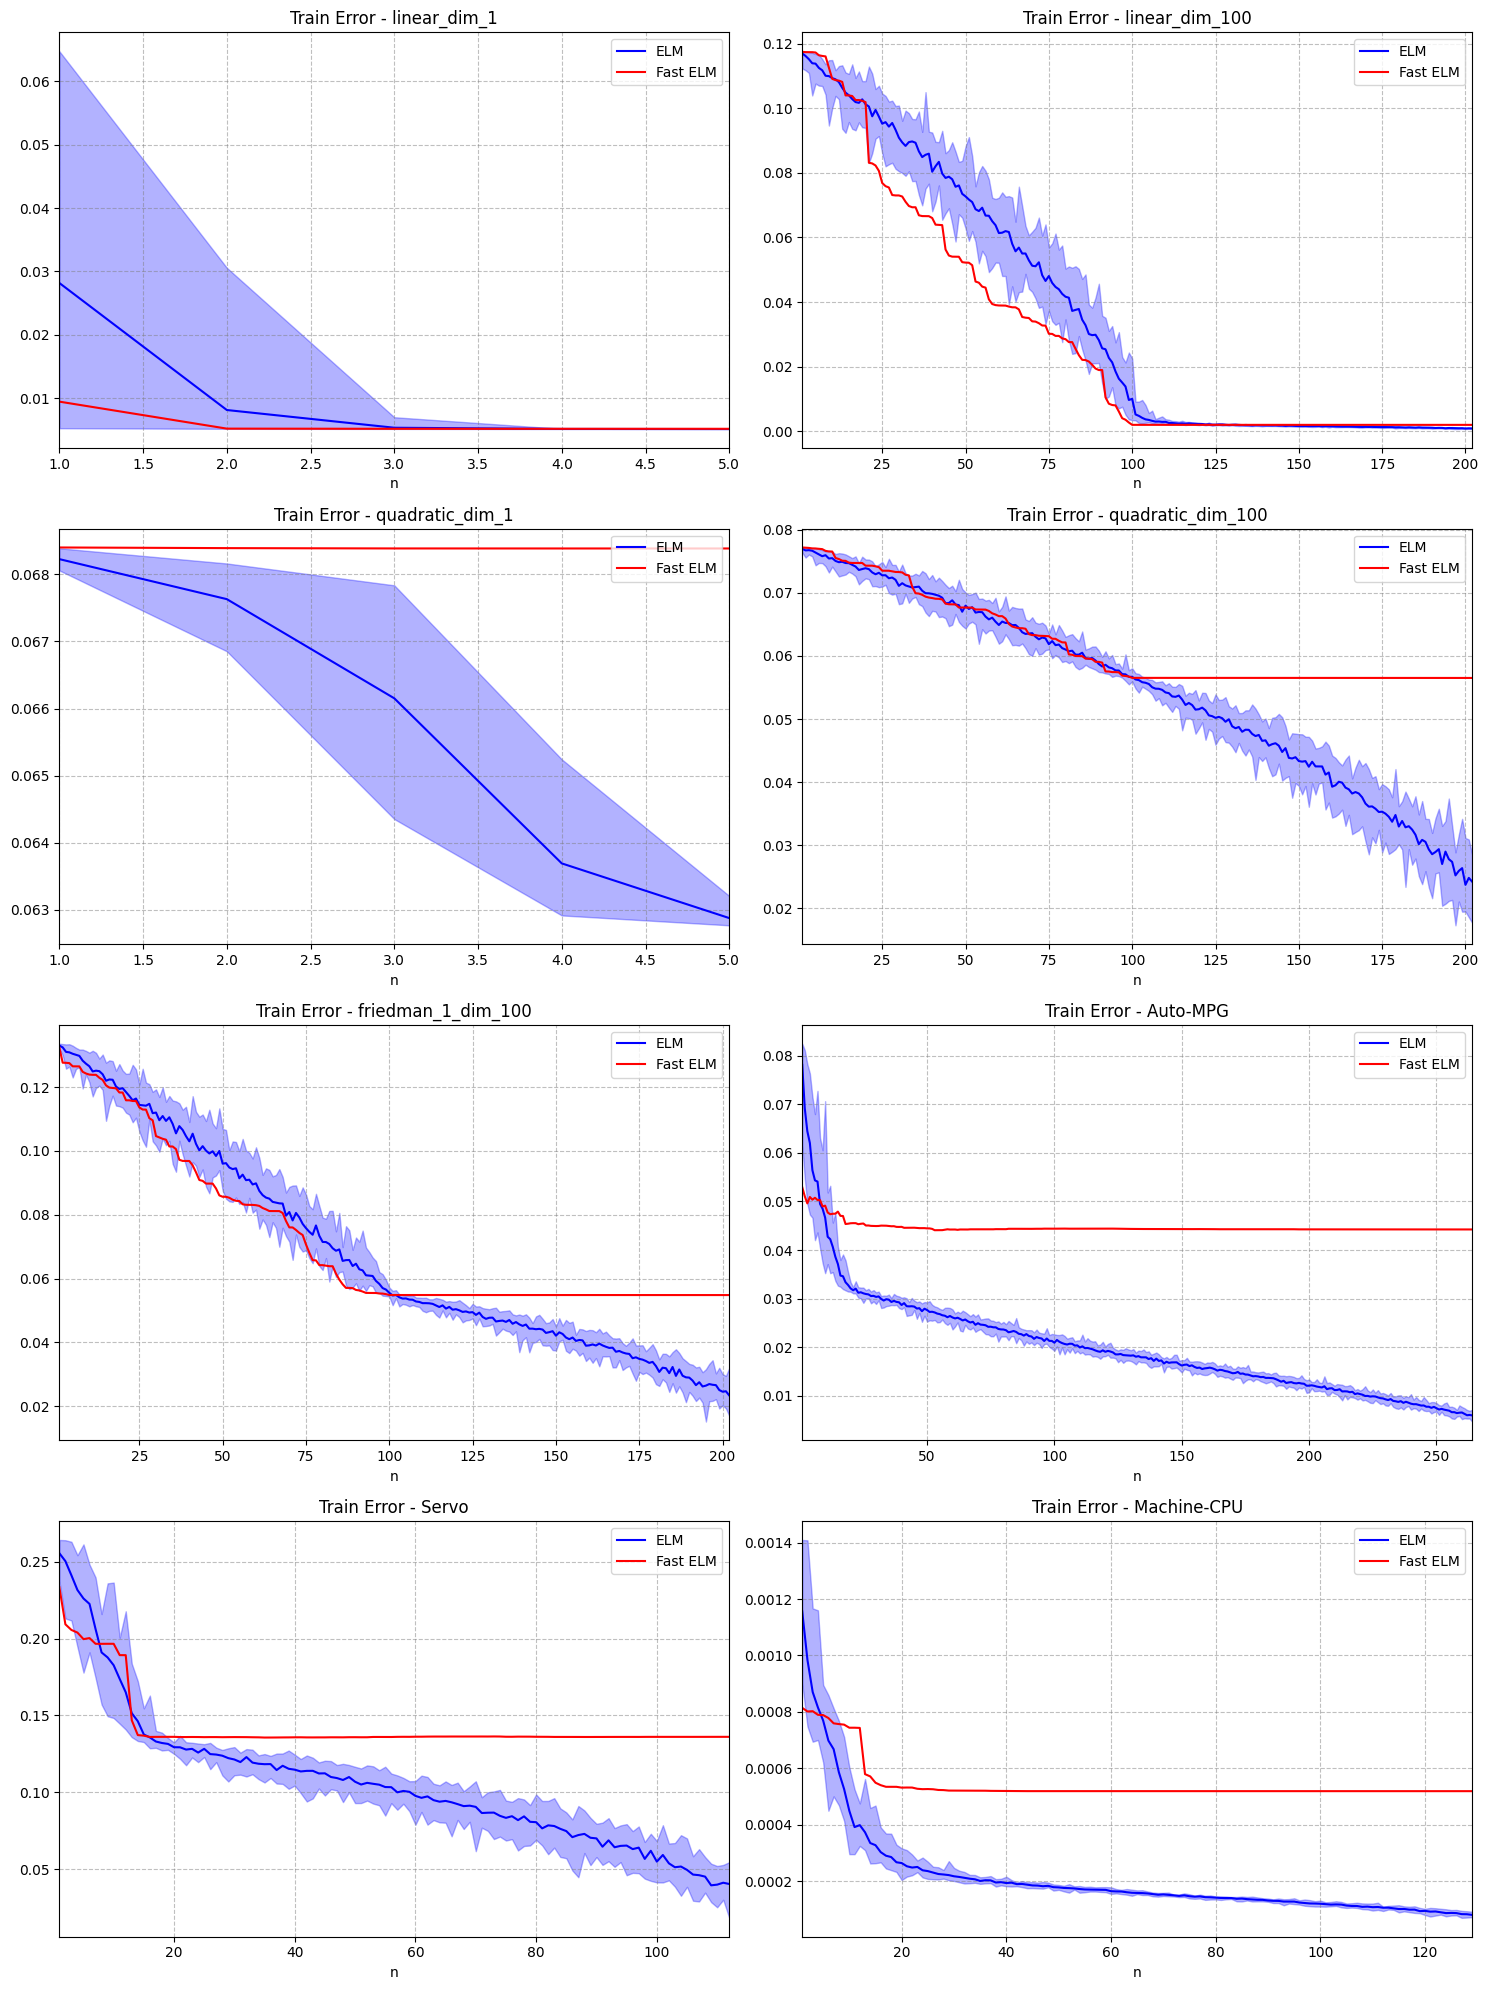

In [11]:

# Directory where the results are stored
results_dir = "results/"

# Initialize lists to store timing data
dataset_names = ['linear_dim_10', 'linear_dim_100','quadratic_dim_10', 'quadratic_dim_100', 'friedman_1_dim_100','Auto-MPG', 'Servo', 'Machine-CPU']
sum_times_ELM_list = []
total_times_FastELM_list = []

# Create a figure for the subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 20))  # 4 rows, 2 columns

# Iterate over the datasets
for idx, dataset_name in enumerate(dataset_names):
    if os.path.isdir(os.path.join(results_dir, dataset_name)):
        # Load the 'results.csv' file
        results_csv_path = os.path.join(results_dir, dataset_name, "results.csv")
        results_df = pd.read_csv(results_csv_path)
        
        # Load the 'times.csv' file
        times_csv_path = os.path.join(results_dir, dataset_name, "times.csv")
        times_df = pd.read_csv(times_csv_path)
        
        # Extract the data
        n_list = results_df["n"]
        train_err_ELM = results_df["train_err_ELM"]
        min_train_err_ELM = results_df["min_train_error_ELM"]
        max_train_err_ELM = results_df["max_train_error_ELM"]
        train_err_FastELM = results_df["train_error_FastELM"]
        
        # Plot the data in the corresponding subplot
        ax = axes[idx // 2, idx % 2]
        ax.set_title("Train Error - " + dataset_name)
        p11, = ax.plot(n_list, train_err_ELM, 'b-')
        ax.fill_between(n_list, min_train_err_ELM, max_train_err_ELM, color='blue', alpha=0.3, label='test error ELM range')
        p12, = ax.plot(n_list, train_err_FastELM, 'r-')
        ax.set_xlim(1, n_list.iloc[-1])
        ax.set_xlabel("n")
        ax.legend([p11, p12], ["ELM", "Fast ELM"], loc='upper right')
        ax.grid(True, linestyle='--', color='gray', alpha=0.5)
        
        # Gather the timing data
        #dataset_names.append(dataset_name)
        sum_times_ELM_list.append(times_df['total_time_ELM'].values[0])
        total_times_FastELM_list.append(times_df['total_time_FastELM'].values[0])

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("combined_plot.png")
plt.show()

# Create a DataFrame for the timing data
timing_data = {
    "Dataset": dataset_names,
    "Sum Times ELM": sum_times_ELM_list,
    "Total Times FastELM": total_times_FastELM_list
}
timing_df = pd.DataFrame(timing_data)

# Save the timing data to a new CSV file
timing_df.to_csv("timing_summary.csv", index=False)

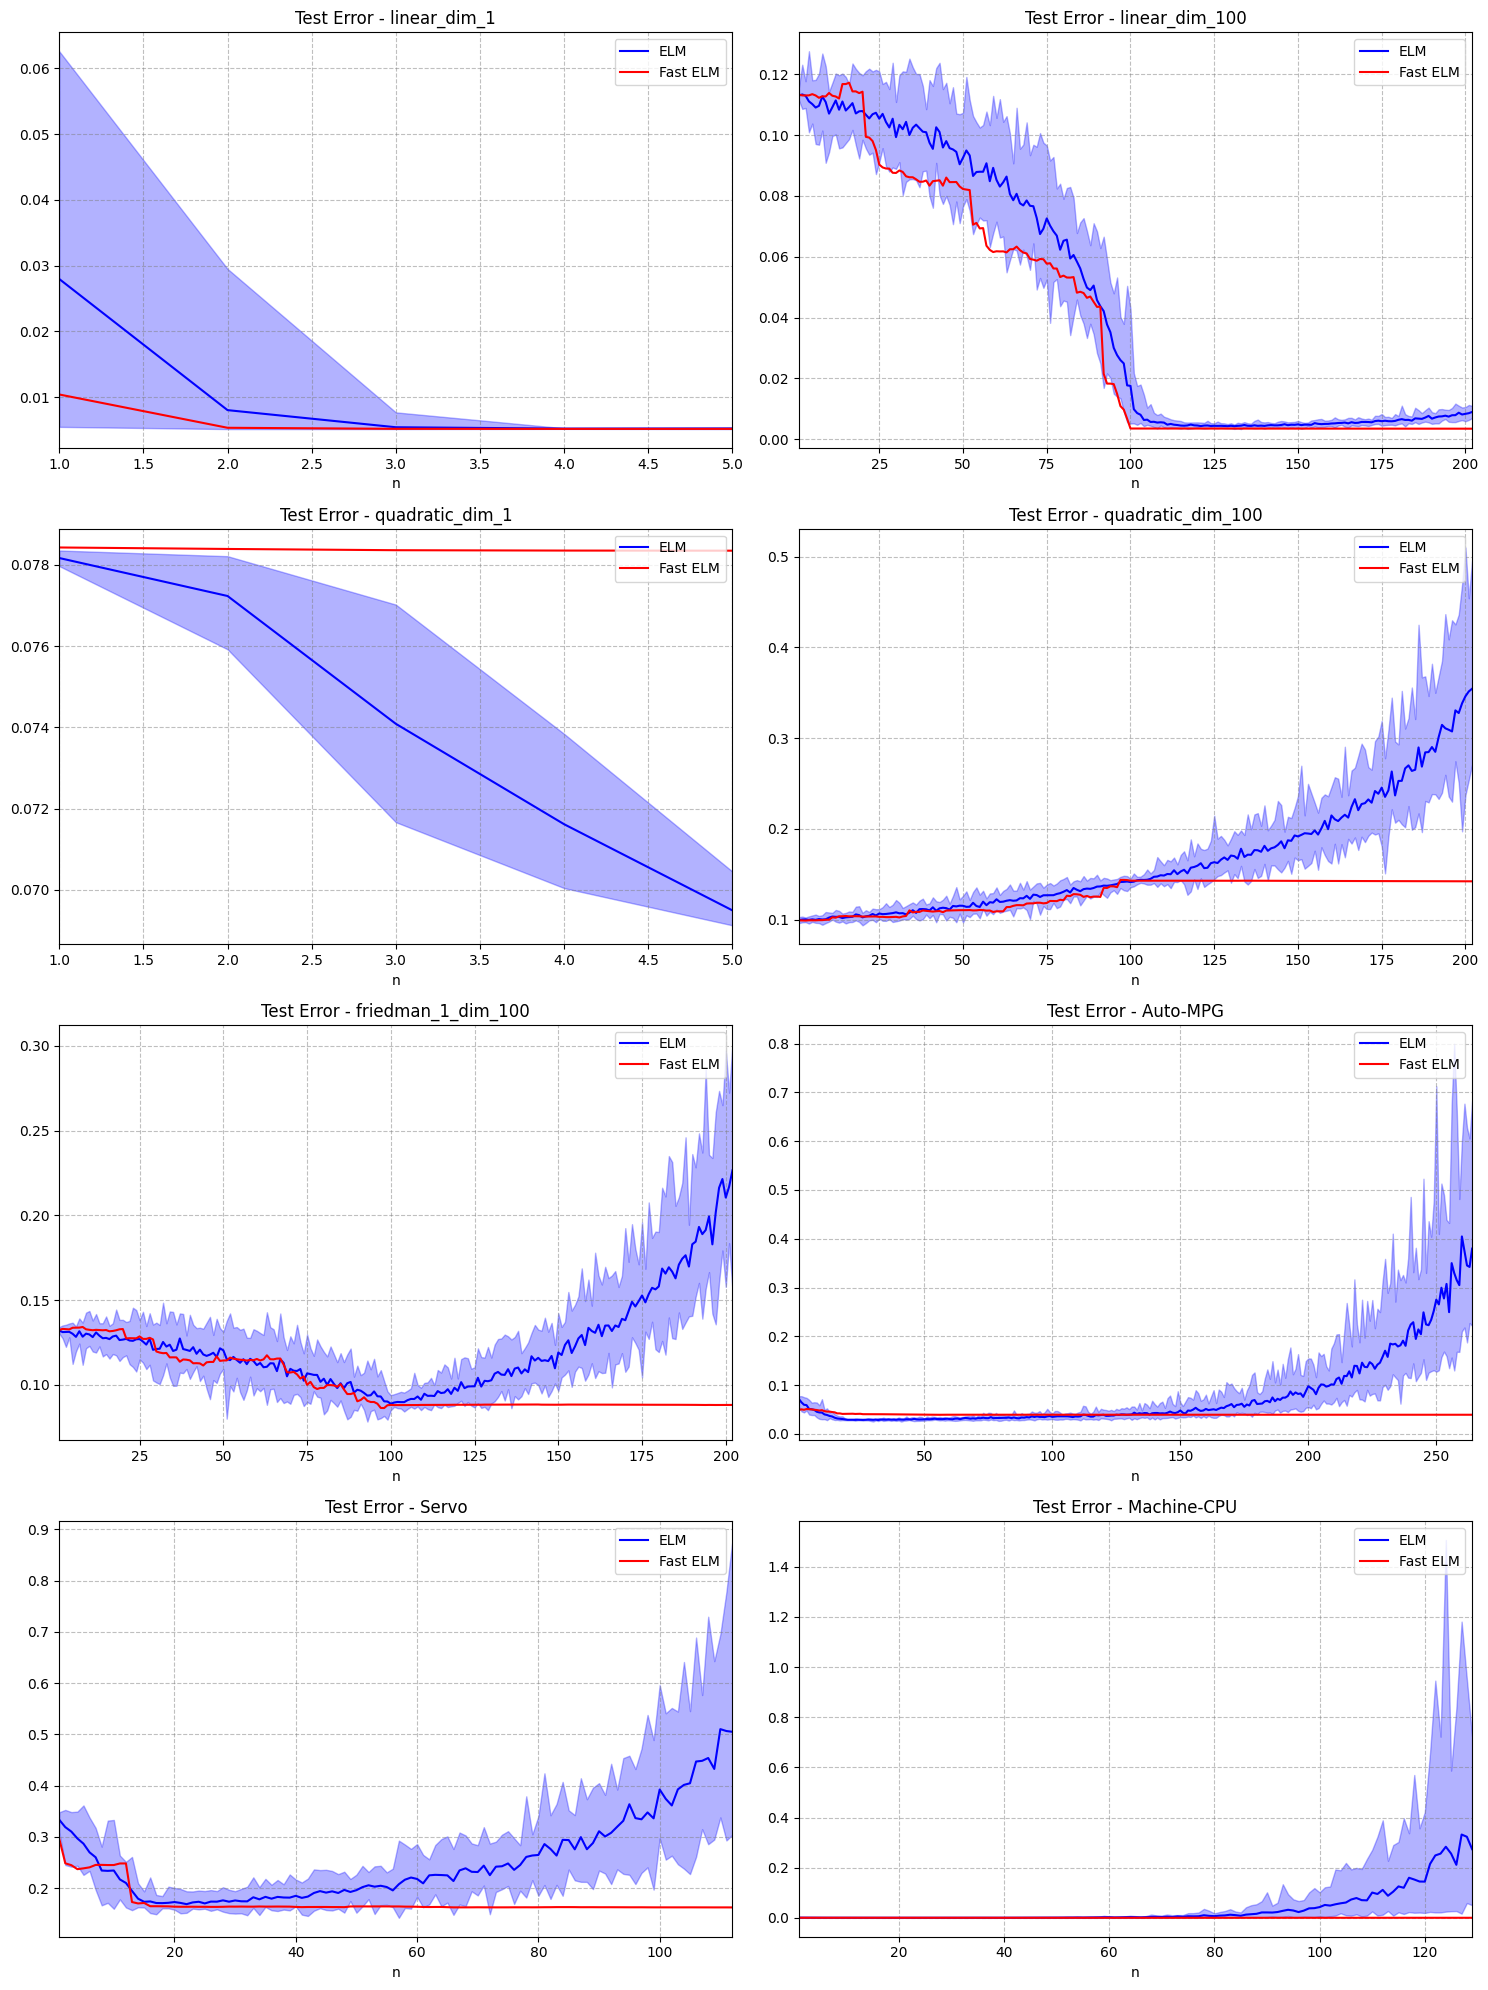

In [12]:

# Directory where the results are stored
results_dir = "results/"

# Initialize lists to store timing data
dataset_names = ['linear_dim_1', 'linear_dim_100','quadratic_dim_1', 'quadratic_dim_100', 'friedman_1_dim_100','Auto-MPG', 'Servo', 'Machine-CPU']
sum_times_ELM_list = []
total_times_FastELM_list = []

# Create a figure for the subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 20))  # 4 rows, 2 columns

# Iterate over the datasets
for idx, dataset_name in enumerate(dataset_names):
    if os.path.isdir(os.path.join(results_dir, dataset_name)):
        # Load the 'results.csv' file
        results_csv_path = os.path.join(results_dir, dataset_name, "results.csv")
        results_df = pd.read_csv(results_csv_path)
        
        # Load the 'times.csv' file
        times_csv_path = os.path.join(results_dir, dataset_name, "times.csv")
        times_df = pd.read_csv(times_csv_path)
        
        # Extract the data
        n_list = results_df["n"]
        test_err_ELM = results_df["test_err_ELM"]
        min_test_err_ELM = results_df["min_test_error_ELM"]
        max_test_err_ELM = results_df["max_test_error_ELM"]
        test_err_FastELM = results_df["test_error_FastELM"]
        
        # Plot the data in the corresponding subplot
        ax = axes[idx // 2, idx % 2]
        ax.set_title("Test Error - " + dataset_name)
        p11, = ax.plot(n_list, test_err_ELM, 'b-')
        ax.fill_between(n_list, min_test_err_ELM, max_test_err_ELM, color='blue', alpha=0.3, label='test error ELM range')
        p12, = ax.plot(n_list, test_err_FastELM, 'r-')
        ax.set_xlim(1, n_list.iloc[-1])
        ax.set_xlabel("n")
        ax.legend([p11, p12], ["ELM", "Fast ELM"], loc='upper right')
        ax.grid(True, linestyle='--', color='gray', alpha=0.5)
        

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("combined_plot.png")
plt.show()
